<a href="https://colab.research.google.com/github/JovanyZepeda/WaterBottleDetector/blob/main/waterBottleDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install detecto


## First Test: Can detectron2 determin the image to be a bottle?

In [ ]:
import matplotlib.pyplot as plt
from detecto import core, utils, visualize

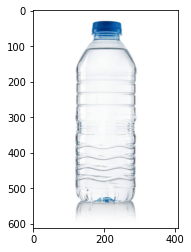

In [ ]:
image = utils.read_image('water_bottle_stock_image.jpg')
plt.imshow(image)
plt.show()

In [ ]:
model = core.Model() 


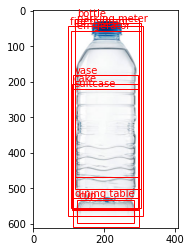

['fire hydrant', 'parking meter', 'dining table', 'vase', 'cup', 'bottle', 'refrigerator', 'cake', 'suitcase']
tensor([[ 97.4668,  43.8517, 307.5463, 578.9385],
        [117.2778,  35.6646, 303.2904, 501.6898],
        [113.0981, 526.5795, 297.8029, 608.7490],
        [111.3578, 180.8287, 294.0339, 558.4478],
        [122.6472, 533.3849, 284.3695, 598.3568],
        [117.6612,  22.5025, 296.9973, 467.8870],
        [107.4129,  56.4064, 304.0301, 556.6560],
        [109.0881, 205.6462, 296.2776, 555.4886],
        [109.7206, 219.5502, 296.5412, 561.9572]])
tensor([0.1331, 0.1001, 0.1890, 0.1461, 0.0586, 0.6147, 0.6198, 0.0701, 0.0622])


In [ ]:
labels, boxes, scores = model.predict_top(image)
visualize.show_labeled_image(image, boxes, labels)

print(labels)
print(boxes)
print(scores)


## Test Two: Can Detectron find bottle from home taken picture?

bottle
tensor([ 452.8114,  445.0941, 1323.7931,  768.7079])
tensor(0.8881)


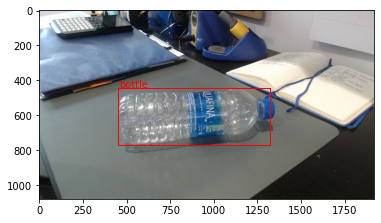

bottle
tensor([ 682.1202,  325.8607, 1277.0906,  883.6905])
tensor(0.9156)


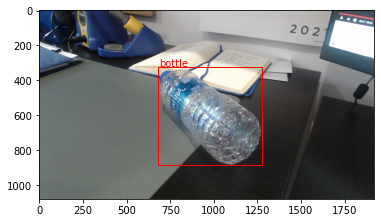

bottle
tensor([ 712.0467,   46.3441, 1031.7639, 1000.6398])
tensor(0.9983)


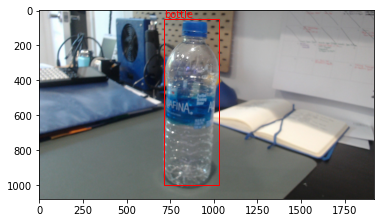

In [ ]:
image_wb1 = utils.read_image("water_bottle_1.jpg")
image_wb2 = utils.read_image("water_bottle_2.jpg")
image_wb3 = utils.read_image("water_bottle_3.jpg")

#Water Bottle 1
labels, boxes, scores = model.predict_top(image_wb1)

#only find the bottle label, score, and box
index_object = 0
for object_guess in labels:
    if object_guess == 'bottle':
        print(labels[index_object])
        print(boxes[index_object])
        print(scores[index_object])
        visualize.show_labeled_image(image_wb1, boxes[index_object], labels[index_object])

    else:
      index_object +=1
      



#Water Bottle 2
labels, boxes, scores = model.predict_top(image_wb2)

#only find the bottle label, score, and box
index_object = 0
for object_guess in labels:
    if object_guess == 'bottle':
        print(labels[index_object])
        print(boxes[index_object])
        print(scores[index_object])
        visualize.show_labeled_image(image_wb2, boxes[index_object], labels[index_object])

    else:
      index_object +=1
      



#Water Bottle 3
labels, boxes, scores = model.predict_top(image_wb3)

#only find the bottle label, score, and box
index_object = 0
for object_guess in labels:
    if object_guess == 'bottle':
        print(labels[index_object])
        print(boxes[index_object])
        print(scores[index_object])
        visualize.show_labeled_image(image_wb3, boxes[index_object], labels[index_object])

    else:
      index_object +=1
      


#Take Picture Using Web Camera and save to folder

##Function deffinition for taking picture

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

##Taking picture and Detect object

<IPython.core.display.Javascript object>

Saved to photo.jpg


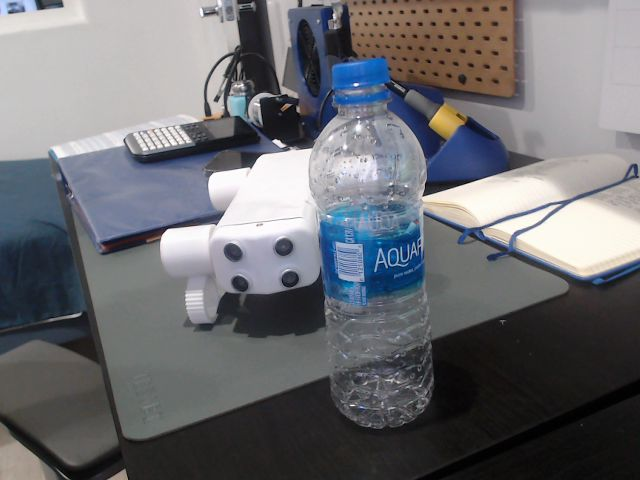

bottle
tensor([310.1477,  43.9071, 431.3936, 426.1617])
tensor(0.9965)


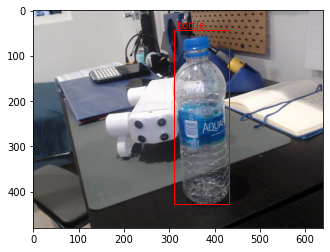

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))

  #Water Bottle 1
  image_wb = utils.read_image(filename)
  labels, boxes, scores = model.predict_top(image_wb) # get data from image

  #only find the bottle label, score, and box
  index_object = 0
  for object_guess in labels:
      if object_guess == 'bottle':
          print(labels[index_object])
          print(boxes[index_object])
          print(scores[index_object])
          visualize.show_labeled_image(image_wb, boxes[index_object], labels[index_object])

      else:
        index_object +=1
      

except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))